<a href="https://colab.research.google.com/github/gursaveks/Personal-Expense-Tracker/blob/main/Lending_Club_Loan_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-854dbafcdaf1>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method="ffill", inplace=True)


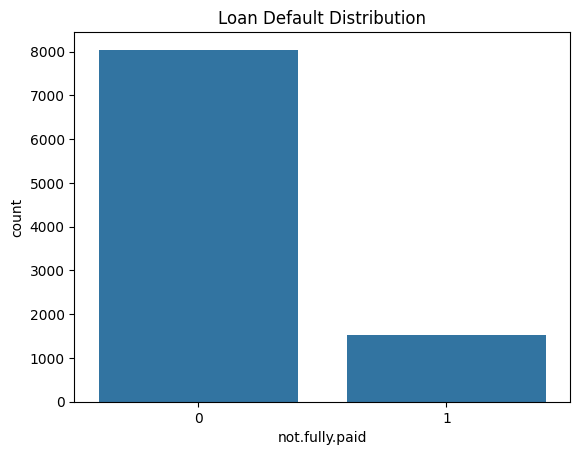

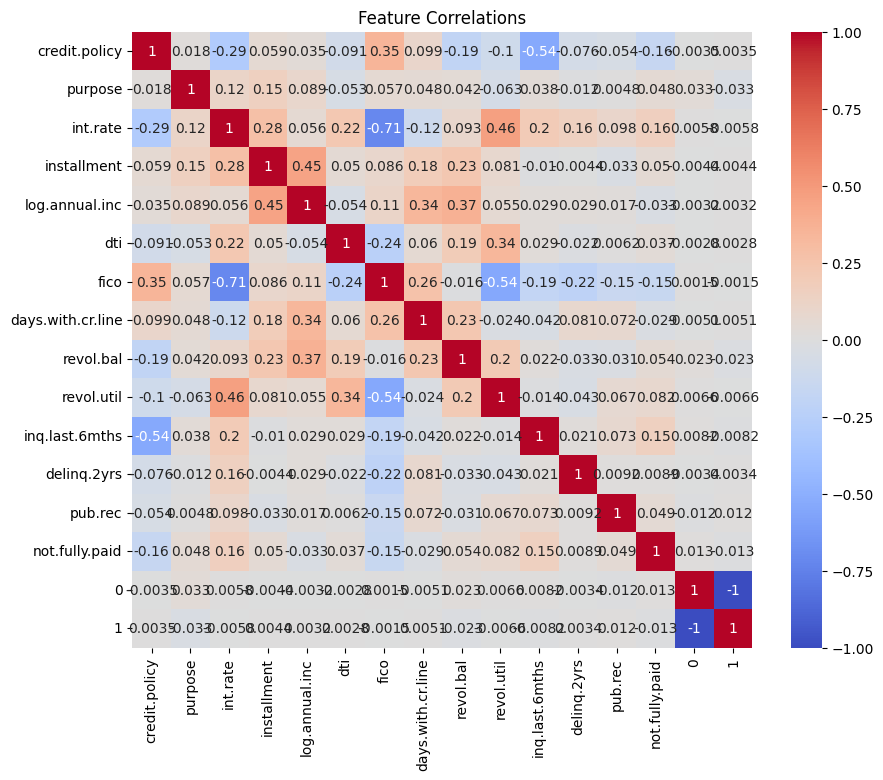

KeyError: "['not.fully.paid'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# Load datasets
loan_data = pd.read_csv("loan_data.csv")  # Replace with actual file paths
output_data = pd.read_csv("output.csv")  # Replace with actual file paths

# Merge or process multiple CSV files as needed
# Assuming output_data contains predictions or additional columns, we can merge it with loan_data
merged_data = pd.concat([loan_data, output_data], axis=1)

# 1. Data Preprocessing
# Handle missing values
merged_data.fillna(method="ffill", inplace=True)

# Encoding categorical variables
categorical_columns = ["purpose"]
encoder = LabelEncoder()
for col in categorical_columns:
    merged_data[col] = encoder.fit_transform(merged_data[col])

# Normalize numeric data
scaler = StandardScaler()
numeric_columns = ["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "revol.util", "inq.last.6mths"]
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])

# Define target variable and features
X = merged_data.drop(columns=["not.fully.paid"], axis=1)
y = merged_data["not.fully.paid"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Exploratory Data Analysis (EDA)
sns.countplot(x="not.fully.paid", data=merged_data)
plt.title("Loan Default Distribution")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

# 3. Feature Engineering
# Drop highly correlated features
threshold = 0.9
correlation_matrix = merged_data.corr()
drop_features = [col for col in correlation_matrix.columns if any(correlation_matrix[col] > threshold)]
X = X.drop(columns=drop_features, axis=1)

# 4. Deep Learning Model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot training vs validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 3. Feature Engineering
# Drop highly correlated features
threshold = 0.9
correlation_matrix = merged_data.corr()
drop_features = [col for col in correlation_matrix.columns if any(correlation_matrix[col] > threshold)]
# Remove 'not.fully.paid' from drop_features if it exists
drop_features = [col for col in drop_features if col != 'not.fully.paid' and col in X.columns]
X = X.drop(columns=drop_features, axis=1)